In [27]:
import pandas as pd 
import matplotlib.pyplot as plt

In [28]:
df_data=pd.read_csv("heart.csv")

In [29]:
df_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [30]:
df_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df_data.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [32]:
df_data.shape

(1025, 14)

In [33]:
missing=df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(10)

Series([], dtype: int64)

In [34]:
df_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [35]:
def mean_value_imputation(df_data,columns):
    mean_value=df_data[columns],mean()
    df_data[columns].fillna(value=mean_value,inplace=true)
def mode_value_imputation(df_data,columns):
    mode=df_data[columns].mode()[0]
    df_data[columns]=df_data[columns].fillna(mode)

In [36]:
num_cols=[cols for cols in df_data.columns if df_data[cols].dtype!='object']
for cols_name in num_cols:
    mean_value_imputation=(df_data,cols_name)

In [37]:
cat_cols=[cols for cols in df_data.columns if df_data[cols].dtype!='object']

for cols_name in cat_cols:
    mode_value_imputation=(df_data,cols_name)

In [38]:
print(f"target:-{df_data['target'].unique()}")

target:-[0 1]


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

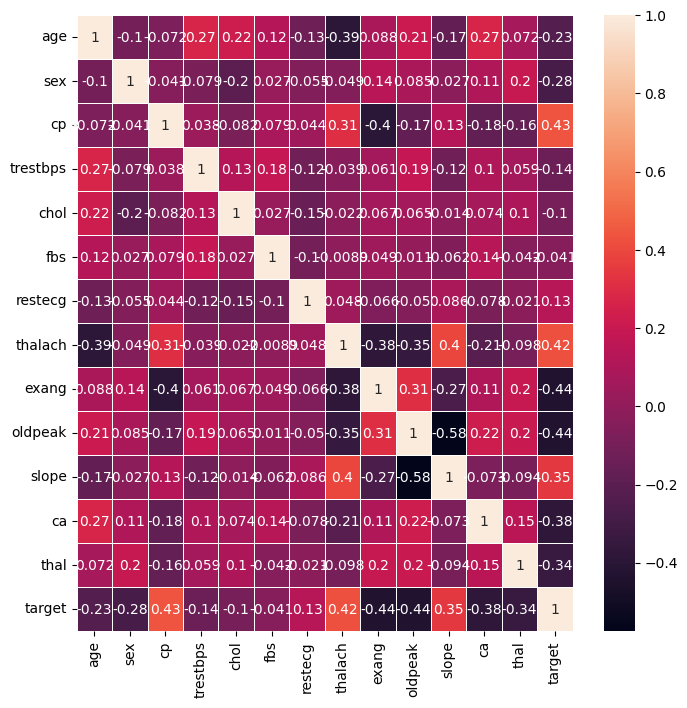

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(df_data.corr(),annot=True,linewidths=0.5)
plt.show()

In [41]:
df_data["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [42]:
import sklearn
from sklearn.model_selection import train_test_split

In [43]:
x=df_data.drop("target", axis=1)
y=df_data["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)
print(f"'x'.shape : {x_train.shape}")
print(f"'y'.shape:{x_test.shape}")

'x'.shape : (768, 13)
'y'.shape:(257, 13)


In [44]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_dct=dct.predict(x_test)
y_pred_dct

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [47]:
model=[]
model.append(('NaiveBayes',GaussianNB()))
model.append(('KNN',KNeighborsClassifier(n_neighbors=8)))
model.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
model.append(('svm',SVC(kernel='linear')))

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [49]:
for name,model in model:

    print(name,model)
    print()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print("accuracy: ",accuracy_score(y_test,y_pred))
    print('\n')
    print("recall: ",recall_score(y_test,y_pred))
    print('\n')
    print("f1score: ",f1_score(y_test,y_pred))
    print('\n')

NaiveBayes GaussianNB()

[[103  30]
 [ 19 105]]


accuracy:  0.8093385214007782


recall:  0.8467741935483871




f1score:  0.8108108108108109


KNN KNeighborsClassifier(n_neighbors=8)

[[92 41]
 [35 89]]


accuracy:  0.7042801556420234


recall:  0.717741935483871


f1score:  0.7007874015748031


DecisionTreeClassifier DecisionTreeClassifier()

[[133   0]
 [  0 124]]


accuracy:  1.0


recall:  1.0


f1score:  1.0


svm SVC(kernel='linear')

[[101  32]
 [ 11 113]]


accuracy:  0.8326848249027238


recall:  0.9112903225806451


f1score:  0.8401486988847584


